Weight = 0, fbeta Score Random Forest: 0.0
Weight = 1, fbeta Score Random Forest: 0.0
Weight = 2, fbeta Score Random Forest: 0.053203434580279
Weight = 3, fbeta Score Random Forest: 0.2573284225378284
Weight = 4, fbeta Score Random Forest: 0.37088607357568903
Weight = 5, fbeta Score Random Forest: 0.4319222461418245
Weight = 6, fbeta Score Random Forest: 0.47016007019326356
Weight = 7, fbeta Score Random Forest: 0.49166614570542466
Weight = 8, fbeta Score Random Forest: 0.5019250565582292
Weight = 9, fbeta Score Random Forest: 0.5039573583667317
Weight = 10, fbeta Score Random Forest: 0.5038551820709066
Weight = 11, fbeta Score Random Forest: 0.5019652364575163
Weight = 12, fbeta Score Random Forest: 0.4994444887192942
Weight = 13, fbeta Score Random Forest: 0.49668579781607036
Weight = 14, fbeta Score Random Forest: 0.49418541385108367
Weight = 15, fbeta Score Random Forest: 0.4913667763069108
Weight = 16, fbeta Score Random Forest: 0.48859282517821134
Weight = 17, fbeta Score Random 

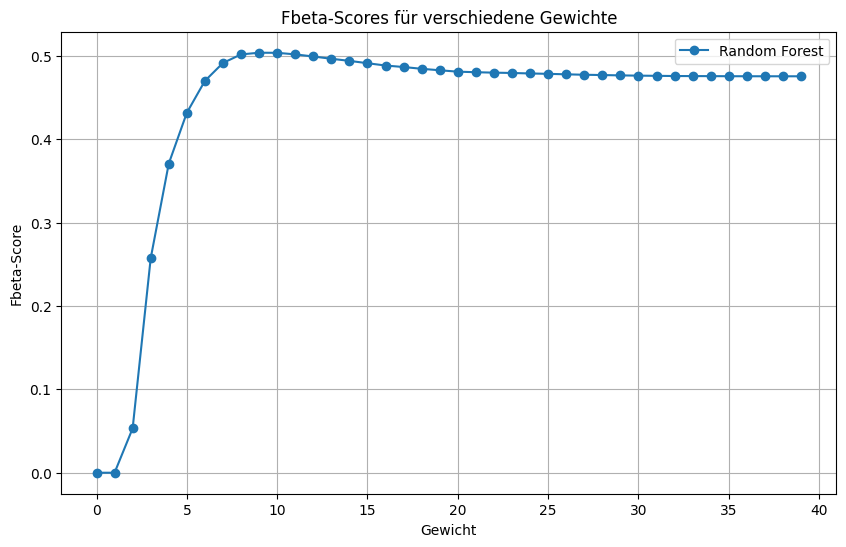

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold

train_data_loaded = pd.read_csv('../../data/train_data_2024-08-01.csv')

X = train_data_loaded.drop(columns=['UKATEGORIE'])
y = train_data_loaded['UKATEGORIE']


# KFold-Konfiguration
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# fbeta mit beta = 2
beta = 2
fbeta_scorer = make_scorer(fbeta_score, beta=beta)

import matplotlib.pyplot as plt

# Leere Listen für Scores

f1_scores_rf = []

weights = range(0, 40)

for i in weights:
    

    # Random Forest
    rf_clas = RandomForestClassifier(n_estimators=344, min_samples_split=400, min_samples_leaf=8,max_features='log2', max_depth=15, random_state=42, class_weight={0:1, 1: i})

    # F1-Score berechnen und speichern
    f1_rf = cross_val_score(rf_clas, X, y, cv=kf, scoring=fbeta_scorer)
    print(f"Weight = {i}, fbeta Score Random Forest: { f1_rf.mean()}")

    f1_scores_rf.append(f1_rf.mean())
    
print("max score: ", max(f1_scores_rf))
# F1-Scores plotten
plt.figure(figsize=(10, 6))

plt.plot(weights, f1_scores_rf, marker='o', label='Random Forest')
plt.title('Fbeta-Scores für verschiedene Gewichte')
plt.xlabel('Gewicht')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()